# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 690042277

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [2]:
import pandas as pd
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,
dia_all.shape

(768, 9)

In [3]:
dia_all.isnull().values.any()

False

In [4]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the inpout (attributes) from target (label)

In [5]:
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [6]:
sourcevars.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
targetvar.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


# Your answers
Please clearly highlight each task.

   ## Taks 1.a [Calculate the mean, median, standard-deviation and correlation matrix for all the input attributes using pandas package]

In [8]:
sourcevars.mean() #mean of all the input attributes

preg      3.845052
plas    120.894531
pres     69.105469
skin     20.536458
insu     79.799479
mass     31.992578
pedi      0.471876
age      33.240885
dtype: float64

In [9]:
sourcevars.median() #median of all the input attributes

preg      3.0000
plas    117.0000
pres     72.0000
skin     23.0000
insu     30.5000
mass     32.0000
pedi      0.3725
age      29.0000
dtype: float64

In [10]:
sourcevars.std()  #Standard Deviation of all the input attributes

preg      3.369578
plas     31.972618
pres     19.355807
skin     15.952218
insu    115.244002
mass      7.884160
pedi      0.331329
age      11.760232
dtype: float64

In [11]:
sourcevars.corr()  #Correlation matrix of all the input attributes

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


   ## Taks 1.b [Draw one chart that should help with understanding the data.]

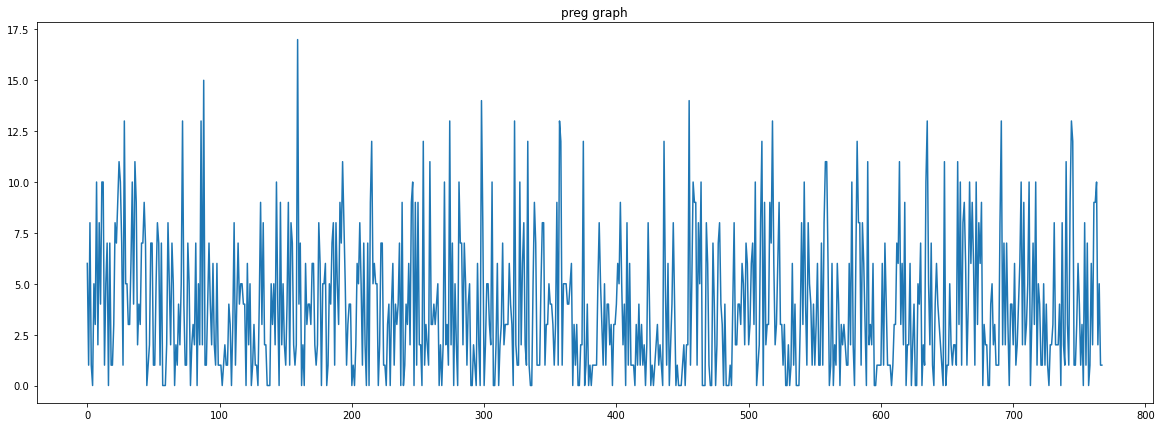

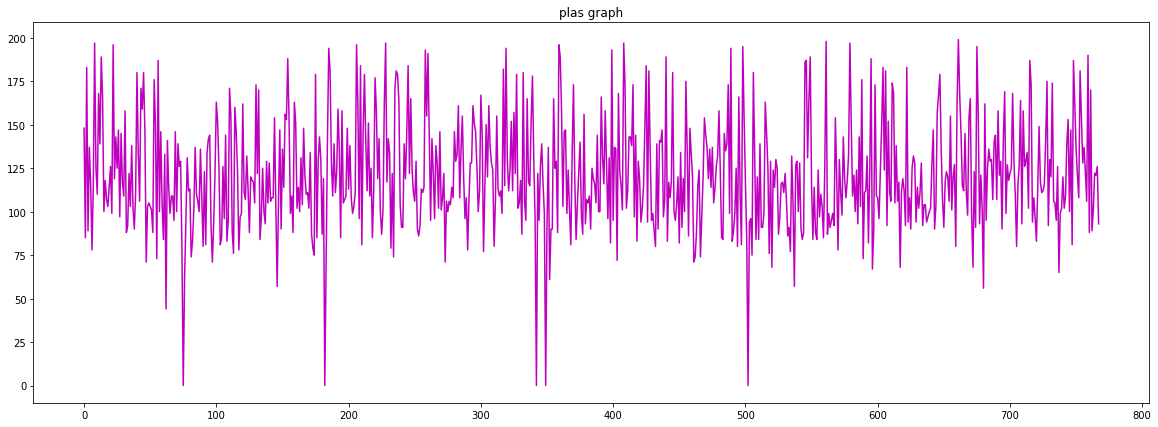

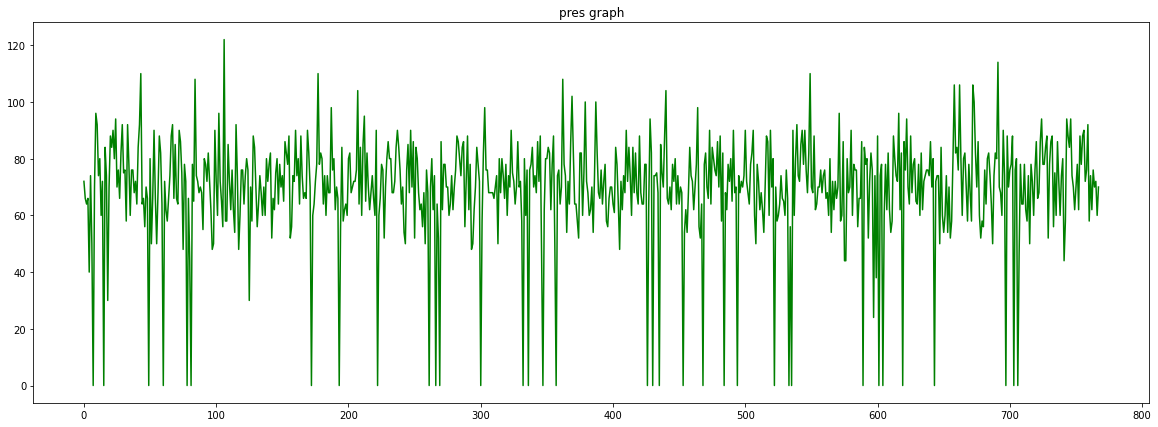

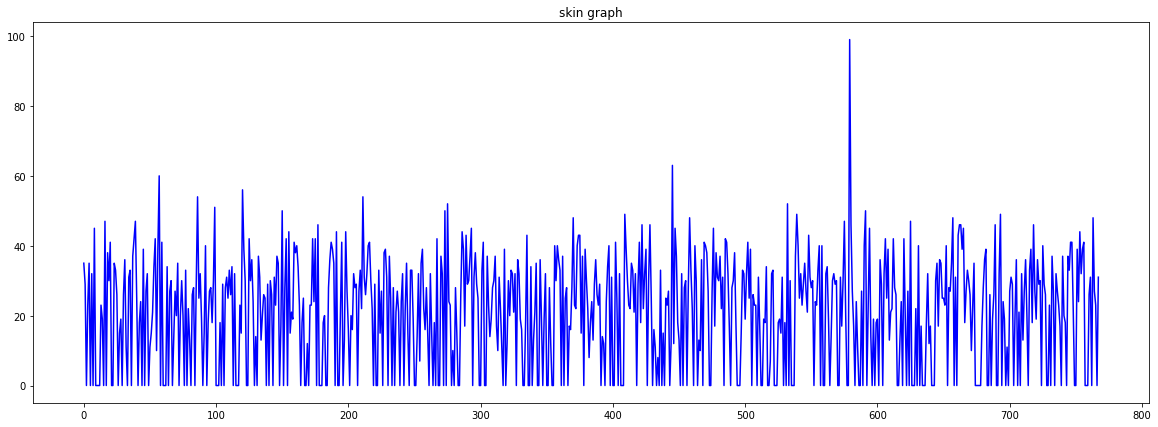

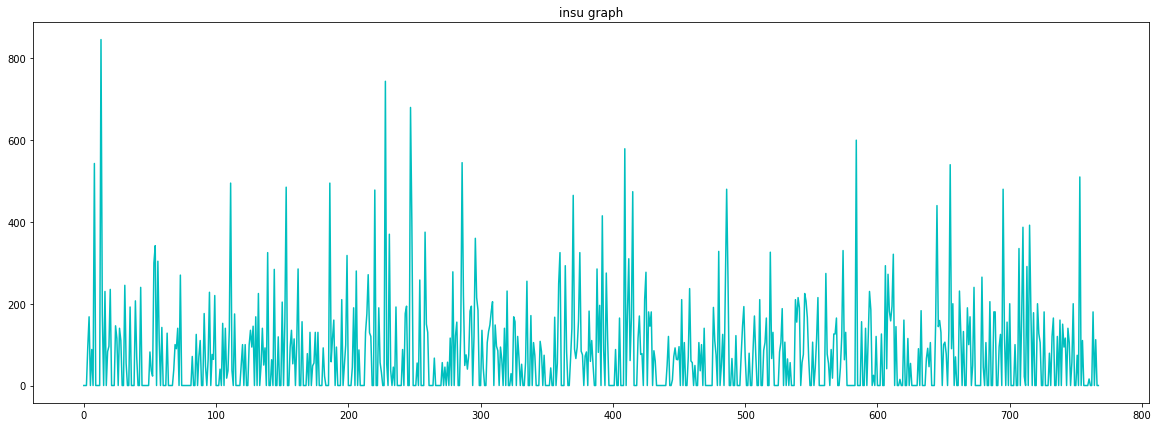

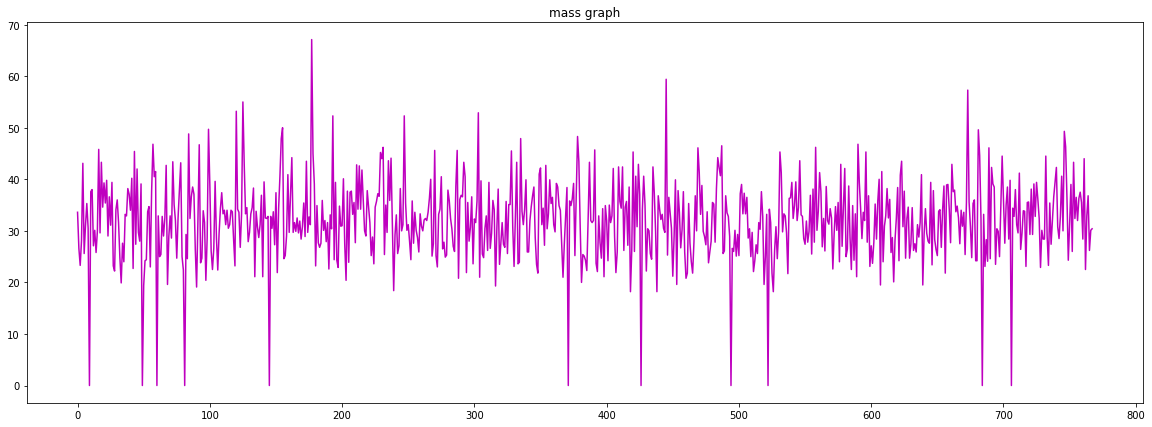

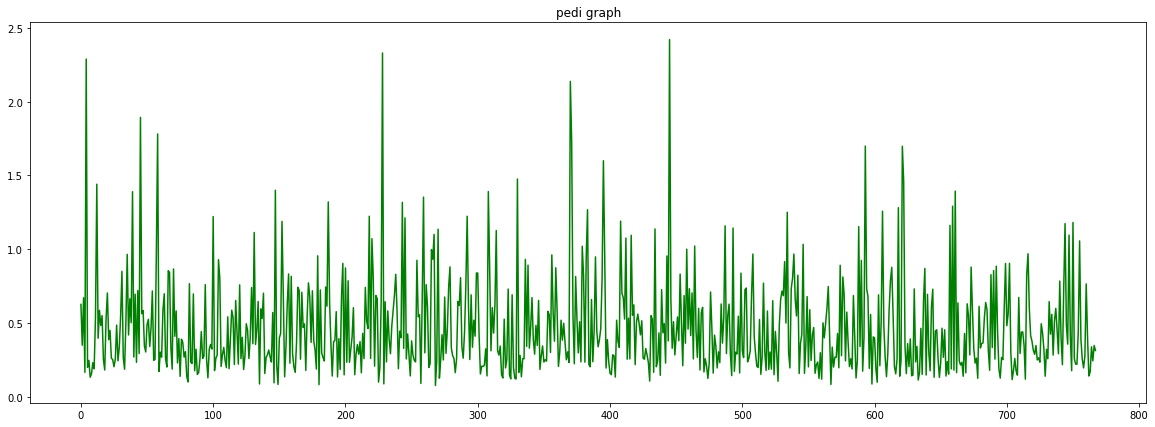

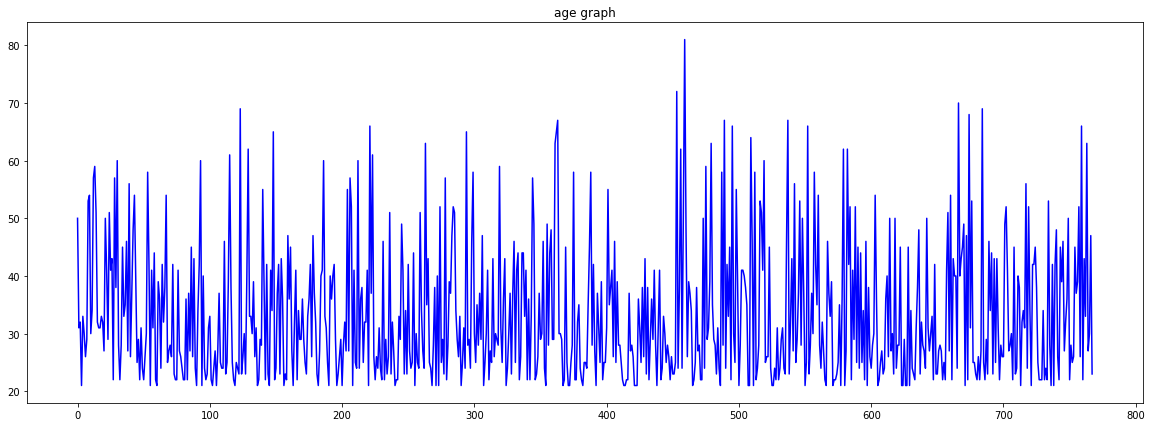

In [23]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,7))
plt.plot(sourcevars['preg'])
plt.title('preg graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['plas'],'m')
plt.title('plas graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['pres'],'g')
plt.title('pres graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['skin'],'b')
plt.title('skin graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['insu'],'c')
plt.title('insu graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['mass'],'m')
plt.title('mass graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['pedi'],'g')
plt.title('pedi graph')
plt.show()

plt.subplots(figsize=(20,7))
plt.plot(sourcevars['age'],'b')
plt.title('age graph')
plt.show()

   ## Task 2.a [Build a Decision Tree classifier using the training dataset and evakuate the performance on the "testing" set]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into training and test dataset. 70% training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = 123)

#Training the Decision Classifier model
classifier_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1234)
classifier_model = classifier_model.fit(X_train, y_train)
classifier_model.score(X_test, y_test)

0.7056277056277056

In [25]:
import numpy as np
lst = [342,543,763,853,356,363,623,635,873,536]
lst1=[]
for i in range(10):  
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = lst[i])
    classifier_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1234)
    classifier_model = classifier_model.fit(X_train, y_train)
    lst1.append(classifier_model.score(X_test, y_test))
    

for i in range(len(lst1)):
    print("The accuracy of data using 'gini' is", lst1[i])

print("\nThe average of 10 experiment using 'gini' is", np.mean(lst1))

The accuracy of data using 'gini' is 0.7532467532467533
The accuracy of data using 'gini' is 0.6406926406926406
The accuracy of data using 'gini' is 0.683982683982684
The accuracy of data using 'gini' is 0.6926406926406926
The accuracy of data using 'gini' is 0.6623376623376623
The accuracy of data using 'gini' is 0.696969696969697
The accuracy of data using 'gini' is 0.6493506493506493
The accuracy of data using 'gini' is 0.6536796536796536
The accuracy of data using 'gini' is 0.6666666666666666
The accuracy of data using 'gini' is 0.6796536796536796

The average of 10 experiment using 'gini' is 0.6779220779220779


In [26]:
from sklearn import tree
text_representation = tree.export_text(classifier_model)
#print(text_representation)

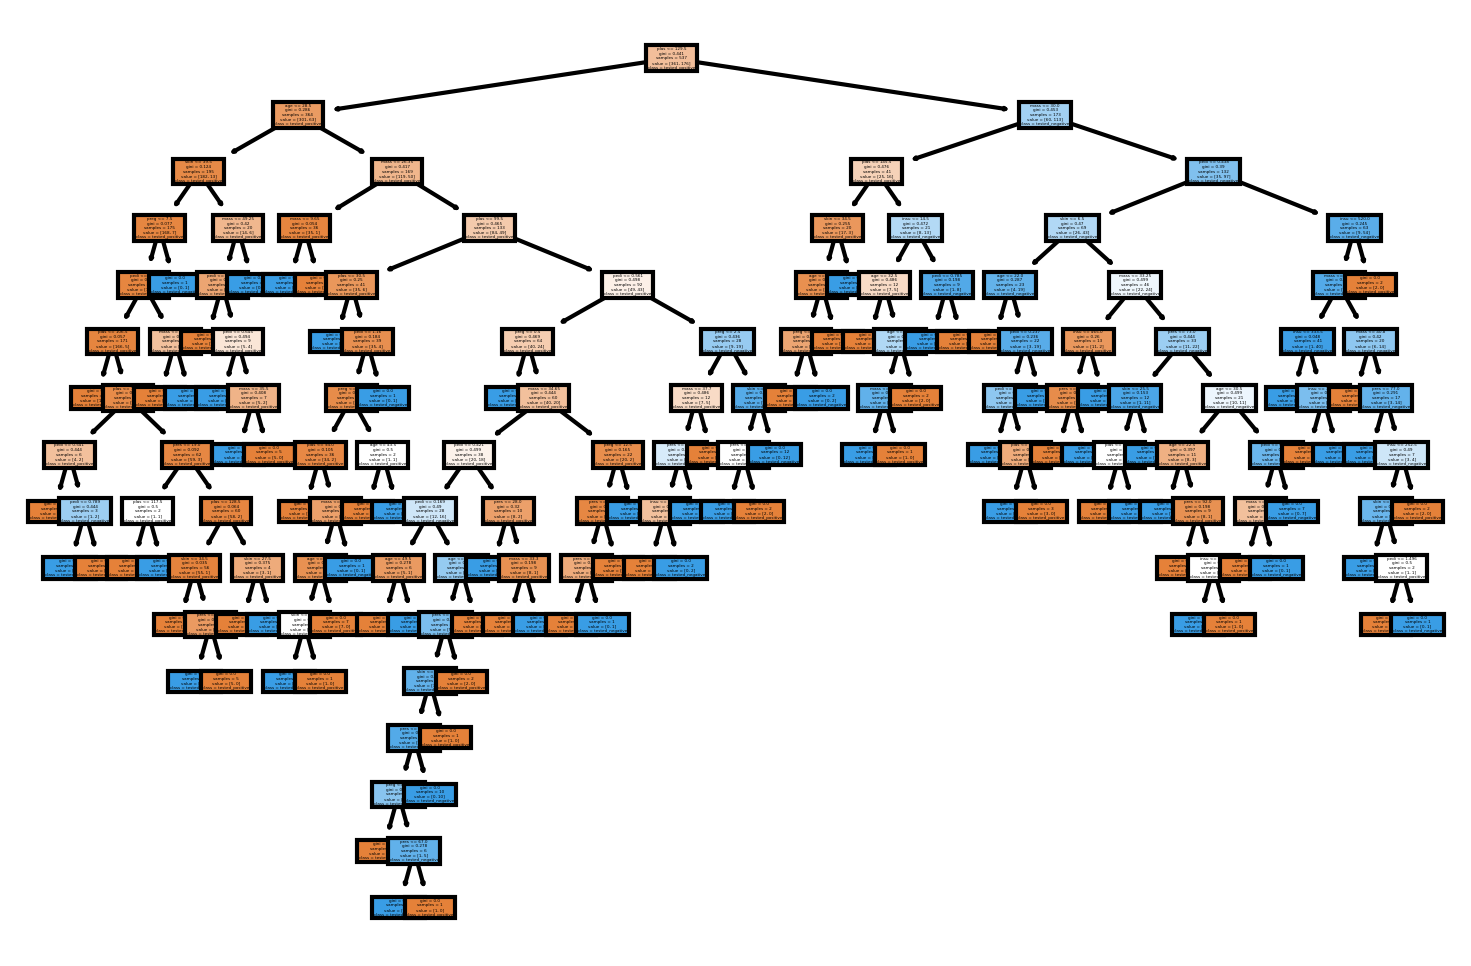

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 1, dpi = 300)

fn = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
cn = ['tested_positive', 'tested_negative']

plotted_tree = plot_tree(classifier_model, feature_names = fn, class_names = cn, filled = True )

## Task 2.b[Compare the performance of the experiment above when you change the criterion from "gini" to "entropy"]

In [29]:
# Splitting the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = 123)

#Training the Decision Classifier model
classifier_model_ent = DecisionTreeClassifier(random_state = 1234)
classifier_model_ent = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train)
print(classifier_model_ent.score(X_test, y_test))

0.7619047619047619


In [30]:
import numpy as np
lst = [342,543,763,853,356,363,623,635,873,536]
lst2=[]
for i in range(10): # Repeating the experiment 10 times
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = lst[i])
    classifier_model_ent = DecisionTreeClassifier(random_state = 1234)
    classifier_model_ent = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train)
    lst2.append(classifier_model_ent.score(X_test, y_test))
    
for i in range(len(lst2)):
    print("The accuracy of data using 'entropy' is", lst2[i])

print("\nThe average of 10 experiment using 'entropy' is", np.mean(lst2))

The accuracy of data using 'entropy' is 0.7229437229437229
The accuracy of data using 'entropy' is 0.696969696969697
The accuracy of data using 'entropy' is 0.6883116883116883
The accuracy of data using 'entropy' is 0.670995670995671
The accuracy of data using 'entropy' is 0.7056277056277056
The accuracy of data using 'entropy' is 0.7229437229437229
The accuracy of data using 'entropy' is 0.6536796536796536
The accuracy of data using 'entropy' is 0.696969696969697
The accuracy of data using 'entropy' is 0.6926406926406926
The accuracy of data using 'entropy' is 0.6666666666666666

The average of 10 experiment using 'entropy' is 0.6917748917748917


## Task 2.c[Compare the performance of the tro classifiers (a) and (b) over the 10 repeats using a suitable chart.]

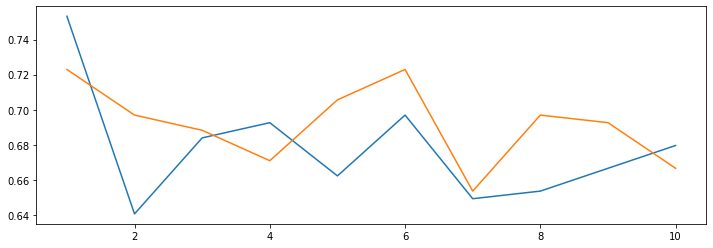

In [31]:
%matplotlib inline
x = np.arange(1,11)
fix, axes = plt.subplots(figsize=(12,4))

plt.plot(x, lst1, x, lst2)
plt.show()

## Task 2.d[Do you think standardizing the data before applying DT would improve the performance of this dataset? Why?]

• No, it will not affect the performance of the decision tree.
• In DT the decision is taken and based on which the split is done.
• If a decision is taken on the non-standardised data, the same decision will be taken on the standardised data.
• For Example - If 50 > X > 100, there are two decisions here, depending on the decision the branching will be done.
Now if the features are scale done by 100.
0.5>X/100>1, decisions will remain the same.
• Standardisation can be used to visualise the data.

## Task 3.a[How does increasing the minimum number of samples required to split an internal node parameter in the DT algorithm (i.e. min_samples_split = 2, 5, 10 and 15) affect the accuracy on the test set? Show your result using a suitable chart or table]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

lst = [2,5,10,15,100,150,200]
lst1=[]
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = 123)
    classifier_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1234, min_samples_split=lst[i])
    classifier_model = classifier_model.fit(X_train, y_train)
    lst1.append(classifier_model.score(X_test, y_test))
    
for i in range(len(lst1)):
    print("The Score of true positive using min_samples_split of", lst[i], " is", lst1[i])

#print("\nThe average of 10 experiment using 'gini' is", np.mean(lst1))

The Score of true positive using min_samples_split of 2  is 0.7056277056277056
The Score of true positive using min_samples_split of 5  is 0.6883116883116883
The Score of true positive using min_samples_split of 10  is 0.70995670995671
The Score of true positive using min_samples_split of 15  is 0.7012987012987013
The Score of true positive using min_samples_split of 100  is 0.7748917748917749
The Score of true positive using min_samples_split of 150  is 0.7532467532467533
The Score of true positive using min_samples_split of 200  is 0.7532467532467533


The maximum accuracy is achieved at an optimam level of min_samples_split at 100 and then the accuracy reduces further

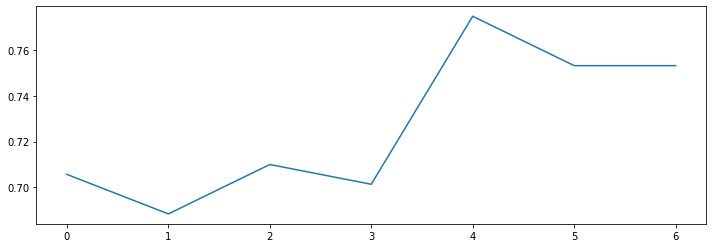

In [ ]:
%matplotlib inline

fix, axes = plt.subplots(figsize=(12,4))

plt.plot(lst1)
plt.show()

## Task 3.b[How does increasing the maximum depth of the decision tree parameter (i.e. maximum depth = 3, 4, 5 and 6) affect the accuracy on the test set? Show your result using a suitable chart or table]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

lst2=[]
for i in range(3, 7):
    X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, test_size = 0.3, random_state = 123)
    classifier_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth = i)
    classifier_model = classifier_model.fit(X_train, y_train)
    lst2.append(classifier_model.score(X_test, y_test))
    #print()

    
for i in range(len(lst2)):
    print("The Score of true positive using max_depth of", i+3, "  is", lst2[i])

#print("\nThe average of 10 experiment using 'gini' is", np.mean(lst1))

The Score of true positive using max_depth of 3   is 0.7272727272727273
The Score of true positive using max_depth of 4   is 0.7272727272727273
The Score of true positive using max_depth of 5   is 0.7359307359307359
The Score of true positive using max_depth of 6   is 0.70995670995671


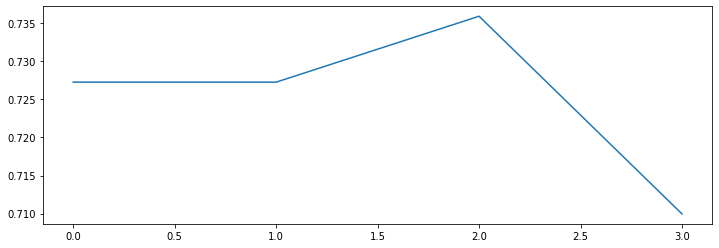

In [ ]:
%matplotlib inline

fix, axes = plt.subplots(figsize=(12,4))

plt.plot(lst2)
plt.show()